# Linear Regression ML Algorithm

Libraries Imported

In [ ]:
from IPython.display import display, Math, Latex #for proper rendering of mathematical equations in colab
import numpy as np #for calculations from scratch
import seaborn as sns
import matplotlib.pyplot as plt
#We rely on synthetic datasets, having couple of advantages
#we know about
#How the data was generated
#Parameters of Data Generation Process
#We can verify easily the parameters learnt by the model whether they are matching with the parameters used for data generation process

Training Data

In [ ]:
#Creating 100 examples of single label and single feature
#Parameters
w0 = 3 #bias
w1 = 4
n = 100 #No. of examples

In [ ]:
#Creating the feature Matrix containing 100 examples with single feature by taking random values between 0&1 and then multiplying it with 10
X = 10 * np.random.random(n, )
#X

In [ ]:
#The label vector is w0+w1*X + noise which is again the random values from 0 to 1
y = w0 + w1 * X + np.random.random(n,)
#y

In [ ]:
#Sanity check that we have examples available for every label
print(f'Shape of feature matrix(X) is {X.shape}')
print(f'Shape of labels(y) is {y.shape}')

Shape of feature matrix(X) is (100,)
Shape of labels(y) is (100,)


In [ ]:
#Dividing the obtained data into Test and Training sets with 20% as test anf 80% as training using sklearn library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)#use of random state is inorder to create a reproducable implementation

In [ ]:
print(f'Shape of Train matrix(X) is {X_train.shape}')
print(f'Shape of Train label is {y_train.shape}')
print(f'Shape of Test matrix(X) is {X_test.shape}')
print(f'Shape of Test labels(y) is {y_test.shape}')

Shape of Train matrix(X) is (80,)
Shape of Train label is (80,)
Shape of Test matrix(X) is (20,)
Shape of Test labels(y) is (20,)


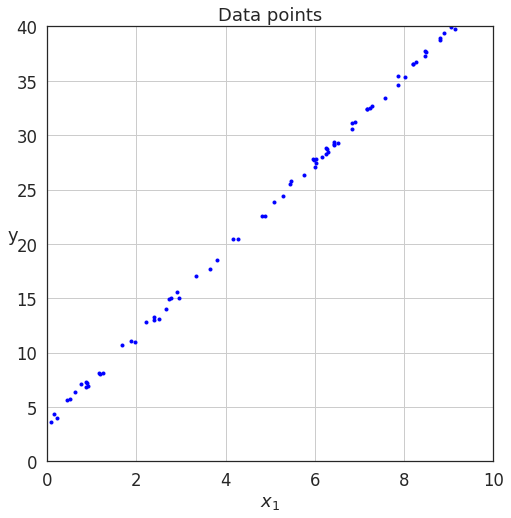

In [ ]:
#Plotting the training dataset

#Formattings in the graph
sns.set_style('white')#white,dark,whitegrid,darkgrid,tcks
f = plt.figure(figsize=(8,8))
sns.set_context(context='notebook',font_scale=1.5,rc={"lines.linewidth":2.5})

plt.plot(X_train, y_train, "b.") #blue dots
plt.title("Data points")
plt.grid(True)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("y", rotation=0,fontsize=18)
plt.axis([0,10,0,40])  # Sets start/end of X and Y axis in the same order.

plt.show()

In [ ]:
#for adding the feature value for bias w0 as x0 which is set to be 1 the feature matrix in order to make the matrix multiplication of X nad w
#np.column_stack((np.ones(X.shape[0]), X))

In [ ]:
# Converting above logic to a function
def add_dummy_feature(x):
    return np.column_stack((np.ones(x.shape[0]), x))

In [ ]:
# testing the above function
train_matrix = np.array([[1,2,3], [4,5,6]]) # each feature is a 3-d vector.
train_matrix = add_dummy_feature(train_matrix)
train_matrix

array([[1., 1., 2., 3.],
       [1., 4., 5., 6.]])

In [ ]:
#apply the function to X_train
X_train = add_dummy_feature(X_train)
#X_train

Model

In [ ]:
def predict(X,w):
  '''Prediction of output label for a given input.
  Arguments
  X: feature matrix of shape (n,m+1), n examples and m features with a dummy feature =m+1
  w: weight matrix of shape (m+1,1), m+1 weights
  Returns predicted vector y of shape(n,)
  '''
  #for checking compatibility of two matrices we use assert 
  assert X.shape[1]==w.shape[0]
  return np.matmul(X,w)#X@w

In [ ]:
#Predicting label follows the equation y = Xw, in its vectorized form.
def predict(X, w):
    if X.shape[1] == w.shape[0]:
        return X @ w
    else:
        return None

In [ ]:
def preprocess(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
    X_train = add_dummy_feature(X_train)
    return X_train, X_test, y_train, y_test

In [ ]:
def generate_examples(n):
    X = 10 * np.random.random(n, )
    y = w0 + w1 * X
    return preprocess(X, y)
# test it with the examples generated using above function
X_train, X_test, y_train, y_test = generate_examples(100)
y_hat =  predict (X_train, np.random.rand(2,))
y_hat

array([4.73257225, 6.58593201, 5.20859363, 5.13586797, 4.74605839,
       3.92655628, 3.05345899, 4.37274281, 6.98635588, 7.74649016,
       3.74524978, 5.46444762, 3.36418179, 6.89974178, 5.04404507,
       4.94028572, 2.13613014, 3.89899946, 7.46634568, 7.01781002,
       0.35036152, 6.2617059 , 0.21280712, 6.17344519, 2.69094975,
       8.56442468, 0.31929024, 3.54784417, 3.71249702, 4.71885603,
       5.46782139, 2.04018829, 1.86598394, 2.39144199, 0.62965855,
       0.95334545, 2.4586967 , 6.2123553 , 7.2372308 , 1.87841674,
       1.4330504 , 4.02068948, 4.5748999 , 3.72061686, 8.33341047,
       3.49312335, 0.62998059, 1.36061063, 1.54320699, 5.0737236 ,
       6.56881068, 7.55304145, 5.77216783, 1.72688831, 7.11584129,
       0.7119577 , 1.798237  , 7.76332589, 0.40640359, 5.81075135,
       1.36673741, 1.47152632, 2.77193066, 3.59224638, 3.07990822,
       4.43770198, 3.66995857, 6.57461734, 1.86641009, 3.49803648,
       6.56437132, 4.0059869 , 7.07333498, 6.90012604, 7.89004

Loss

In [ ]:
def loss(X,y,w=None):
  if w is None:
    w=np.zeros(X.shape[1])
  e=X@w - y
  return (0.5)*(e.T@e)

In [ ]:
X = np.array([[1,3,2,5],[1,9,4,7]])
y=np.array([6,11])
w=np.array([1,1,1,1])

loss(X,y,w)

62.5

In [ ]:
def rmse(X,y):
  return np.sqrt(2/X.shape[0] * loss(X,y))

In [ ]:
#Generating random weights weight vector
w = 10*np.random.rand(2,)
print(w[0],w[1])

1.1315174680815643 1.7301869773096812


Optimization

In [ ]:
#Normal Equation
def normal_equation(X,y):
  return np.linalg.pinv(X) @ y

In [ ]:
#Gradient DESCENT Method
lr = 0.0001
def calculate_gradient(X,y,w):
  return np.transpose(X)@((X@w)-y)

In [ ]:
def weight_update(w,lr,g):
  return w-lr*g

In [ ]:
def gradient_descent(X, y, epochs):
    # Start with an arbitrary weight vector say, [0, 0].  
    # After "many" iterations, we should reach the original weight vector [3,4]]
    losses = list() 
    weights = list()
    w = np.zeros(X.shape[1])
    for i in range(epochs):
        l = loss(X_train, y_train, w)
        losses.append(l)
        g = calculate_gradient(X, y, w)
        w = weight_update(w, lr, g)
        weights.append(w)
    return weights, losses

###Mini Batch Gradient Descent

In [ ]:
def mini_batch_gd(X, y, iterations, mini_batch_size):
    t = 0
    w = np.zeros(X.shape[1])  #initializing arbitrary values.
    weights, losses = list(), list()

    for iteration in range(iterations):
        shuffled_indices = np.random.permutation(X.shape[0])
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, X.shape[0], mini_batch_size):
            t += 1
            x1 = X_shuffled[i:i+mini_batch_size]
            y1 = y_shuffled[i:i+mini_batch_size]

            l = loss(x1, y1, w)
            losses.append(l)

            g = 2/mini_batch_size * calculate_gradient(x1, y1, w)
            w = weight_update(w, learning_schedule(t), g)
            weights.append(w)

    return weights, losses


###Stochastic Gradient Descent

In [ ]:
def sgd(X, y, iterations):
    t = 0
    w = np.zeros(X.shape[1])  #initializing arbitrary values.
    weights, losses = list(), list()
    
    for iteration in range(iterations):
        shuffled_indices = np.random.permutation(X.shape[0])
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, X.shape[0], mini_batch_size):
            t += 1
            x1 = X_shuffled[i:i+1]
            y1 = y_shuffled[i:i+1]

            l = loss(x1, y1, w)
            losses.append(l)

            g = 2/mini_batch_size * calculate_gradient(x1, y1, w)
            w = weight_update(w, learning_schedule(t), g)
            weights.append(w)

    return weights, losses

In [3]:
import numpy as np
a = np.arange(1,5).reshape(-1,2)
b = np.arange(5,9).reshape(2,-1)
print(a)
print(b)
print(a.mean(axis = 0))
print(b.mean(axis = 1))
print(a.mean(axis = 0)+b.mean(axis = 1))

[[1 2]
 [3 4]]
[[5 6]
 [7 8]]
[2. 3.]
[5.5 7.5]
[ 7.5 10.5]
